In [1]:
import pandas as pd 
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.io as pio
pio.renderers.default = "png"

df=pd.read_csv('amazon.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [2]:
#split user_id and user_name
df['user_id'] = df['user_id'].str.split(',', expand=False)
df['user_name'] = df['user_name'].str.split(',', expand=False)

In [3]:
#divide the data into other rows
df1 = df.explode('user_name', ignore_index=True)
df2 = df.explode('user_id', ignore_index=True)
df1.drop("user_id", axis=1, inplace=True)
df1["user_id"] = df2["user_id"]
df1.isnull().sum()

product_id              0
product_name            0
category                0
discounted_price        0
actual_price            0
discount_percentage     0
rating                  0
rating_count            2
about_product           0
user_name               0
review_id               0
review_title            0
review_content          0
img_link                0
product_link            0
user_id                12
dtype: int64

In [4]:
#split the categories
df_category = df1['category'].str.split('|', expand = True).rename(columns={0:'category_1', 1:'category_2', 2:'category_3', 3:'category_4',4:'category_5',})
df_category.isnull().sum()

category_1        0
category_2        0
category_3       60
category_4     1300
category_5     7385
5             10841
6             11411
dtype: int64

In [5]:
#add df_category to df1
df1['main_category'] = df_category['category_1']
df1['sub_category'] = df_category['category_2']
df1['category_3'] = df_category['category_3']
df1['category_4'] = df_category['category_4']
df1['category_5'] = df_category['category_5']

In [6]:
#drop the main category column
df1.drop('category', axis=1, inplace=True)
df1.isnull().sum()

product_id                0
product_name              0
discounted_price          0
actual_price              0
discount_percentage       0
rating                    0
rating_count              2
about_product             0
user_name                 0
review_id                 0
review_title              0
review_content            0
img_link                  0
product_link              0
user_id                  12
main_category             0
sub_category              0
category_3               60
category_4             1300
category_5             7385
dtype: int64

In [7]:
#checking the table
df1.head()

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_name,review_id,review_title,review_content,img_link,product_link,user_id,main_category,sub_category,category_3,category_4,category_5
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,Manav,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,AG3D6O4STAQKAY2UVGEUV46KN35Q,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables
1,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,Adarsh gupta,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,AHMY5CWJMMK5BJRBBSNLYT3ONILA,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables
2,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,Sundeep,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,AHCTC6ULH4XB6YHDY6PCH2R772LQ,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables
3,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,S.Sayeed Ahmed,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables
4,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,jaspreet singh,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables


In [8]:
#Separate words from main and sub category
df1['main_category'] = df1['main_category'].str.replace(',', ' , ')
df1['main_category'] = df1['main_category'].str.replace('&', ' & ')

df1['sub_category'] = df1['sub_category'].str.replace(',', ' , ')
df1['sub_category'] = df1['sub_category'].str.replace('&', ' & ')

In [9]:
#checking the values of rating column
df1["rating"].value_counts()

4.1    1914
4.2    1813
4.3    1804
4.0    1033
3.9     979
4.4     966
3.8     683
4.5     590
4       412
3.7     325
3.6     274
3.5     207
4.6     126
3.3     120
3.4      80
4.7      45
3.1      25
4.8      19
3.0      17
2.8      16
3.2      14
5.0      14
|         8
3         8
2.6       8
2.9       8
2.3       5
2         2
Name: rating, dtype: int64

In [10]:
#shows the "|" values
df1.query('rating=="|"')

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_name,review_id,review_title,review_content,img_link,product_link,user_id,main_category,sub_category,category_3,category_4,category_5
10065,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"₹2,099","₹2,499",16%,|,992,No Installation is provided for this product|1...,Divya,"R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...,AEASTV5BKJJIYW6WVS6JUBSK4MHA,Home & Kitchen,Kitchen & HomeAppliances,"Vacuum,Cleaning&Ironing",Vacuums&FloorCare,Vacuums
10066,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"₹2,099","₹2,499",16%,|,992,No Installation is provided for this product|1...,Dr Nefario,"R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...,AHQ7UT4SYDQMQB6DJDBVVHQBCXXA,Home & Kitchen,Kitchen & HomeAppliances,"Vacuum,Cleaning&Ironing",Vacuums&FloorCare,Vacuums
10067,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"₹2,099","₹2,499",16%,|,992,No Installation is provided for this product|1...,Deekshith,"R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...,AEZFDGHBWLHUXOLDPVNS3UERDNSQ,Home & Kitchen,Kitchen & HomeAppliances,"Vacuum,Cleaning&Ironing",Vacuums&FloorCare,Vacuums
10068,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"₹2,099","₹2,499",16%,|,992,No Installation is provided for this product|1...,Preeti,"R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...,AFPMGJN4SHWHD3DBQBS2FXGBZ6TA,Home & Kitchen,Kitchen & HomeAppliances,"Vacuum,Cleaning&Ironing",Vacuums&FloorCare,Vacuums
10069,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"₹2,099","₹2,499",16%,|,992,No Installation is provided for this product|1...,Prasanth R,"R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...,AGDD5ACY3AGTMTVBQOC3DMUR6REA,Home & Kitchen,Kitchen & HomeAppliances,"Vacuum,Cleaning&Ironing",Vacuums&FloorCare,Vacuums
10070,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"₹2,099","₹2,499",16%,|,992,No Installation is provided for this product|1...,Pradeep kashiram Tetgure.,"R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...,AFHT3WYWI4DB6Z42VVJZQGFFNIZA,Home & Kitchen,Kitchen & HomeAppliances,"Vacuum,Cleaning&Ironing",Vacuums&FloorCare,Vacuums
10071,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"₹2,099","₹2,499",16%,|,992,No Installation is provided for this product|1...,Abhijin Janardhan,"R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...,AFSHYGNQHXNKBEXS62GRETNGH3GQ,Home & Kitchen,Kitchen & HomeAppliances,"Vacuum,Cleaning&Ironing",Vacuums&FloorCare,Vacuums
10072,B08L

In [11]:
#change the "|" to 4.0 based on main website
df1
df1['rating']=df1['rating'].str.replace('|', '4.0').astype(float)

C:\Users\Ryzen\AppData\Local\Temp\ipykernel_11992\3942109306.py:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [12]:
df1.shape

(11515, 20)

In [13]:
#checking the Null rating_count
df1[df1['rating_count'].isnull()==True]

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_name,review_id,review_title,review_content,img_link,product_link,user_id,main_category,sub_category,category_3,category_4,category_5
2229,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,₹199,₹999,80%,3.0,NaN,USB C to C Cable: This cable has type C connec...,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...,AG5VQTV5OVY2Q42ZQPWXTRU2PSLQ,Computers & Accessories,Accessories & Peripherals,Cables&Accessories,Cables,USBCables
2553,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",₹249,₹999,75%,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...,AFOOUANHTKWSTZRG3HSE3TR7L5CQ,Computers & Accessories,Accessories & Peripherals,Cables&Accessories,Cables,USBCables


In [14]:
df1['rating_count'].fillna(df1['rating_count'].mode()[0], inplace=True)

In [15]:
df1.isnull().sum()

product_id                0
product_name              0
discounted_price          0
actual_price              0
discount_percentage       0
rating                    0
rating_count              0
about_product             0
user_name                 0
review_id                 0
review_title              0
review_content            0
img_link                  0
product_link              0
user_id                  12
main_category             0
sub_category              0
category_3               60
category_4             1300
category_5             7385
dtype: int64

In [16]:
#checking the user_id Null values
df1[df1["user_id"].isnull()==True].head()

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_name,review_id,review_title,review_content,img_link,product_link,user_id,main_category,sub_category,category_3,category_4,category_5
11503,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"₹1,399","₹1,890",26%,4.0,"8,031",Fan sweep area: 230 MM ; Noise level: (40 - 45...,ASHISHGAJBE,"R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...","Fan Speed is slow,Good quality,Good product,go...",I have installed this in my kitchen working fi...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Havells-Ventilair-230mm-...,NaN,Home & Kitchen,"Heating , Cooling & AirQuality",Fans,ExhaustFans,None
11504,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"₹1,399","₹1,890",26%,4.0,"8,031",Fan sweep area: 230 MM ; Noise level: (40 - 45...,hirabhai thakarda,"R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...","Fan Speed is slow,Good quality,Good product,go...",I have installed this in my kitchen working fi...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Havells-Ventilair-230mm-...,NaN,Home & Kitchen,"Heating , Cooling & AirQuality",Fans,ExhaustFans,None
11505,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"₹1,399","₹1,890",26%,4.0,"8,031",Fan sweep area: 230 MM ; Noise level: (40 - 45...,khageswar,"R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...","Fan Speed is slow,Good quality,Good product,go...",I have installed this in my kitchen working fi...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Havells-Ventilair-230mm-...,NaN,Home & Kitchen,"Heating , Cooling & AirQuality",Fans,ExhaustFans,None
11506,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"₹1,399","₹1,890",26%,4.0,"8,031",Fan sweep area: 230 MM ; Noise level: (40 - 45...,A.Ramu,"R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...","Fan Speed is slow,Good quality,Good product,go...",I have installed this in my kitchen working fi...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Havells-Ventilair-230mm-...,NaN,Home & Kitchen,"Heating , Cooling & AirQuality",Fans,ExhaustFans,None
11507,B01486F4G6,Borosil Jumbo 1000-Watt Grill Sandwich Maker (...,"₹2,863","₹3,690",22%,4.3,"6,987","Brand-Borosil, Specification â€“ 23V ~ 5Hz;1 W...",Rajib,"R20RBRZ0WEUJT9,ROKIFK9R2ISSE,R30EEG2FNJSN5I,R2...","Works perfect,Ok good product,Nice Product. Re...",It does it job perfectly..only issue is temp c...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Borosil-Jumbo-1000-Watt-...,NaN,Home & Kitchen,Kitchen & HomeAppliances,SmallKitchenAppliances,SandwichMakers,None


In [17]:
#change the NaN data
df1['user_id'].fillna(df1['user_id'].mode()[0], inplace=True)

In [18]:
#Start Visualizing
#Count Products by main and sub 
cat = df1.groupby(['main_category','sub_category']).agg('count').iloc[:,1].rename_axis().reset_index(name='Total Product')
cat = pd.pivot_table(cat, index=['main_category', 'sub_category', 'Total Product'])
cat

Empty DataFrame
Columns: []
Index: [(Car & Motorbike, CarAccessories, 8), (Computers & Accessories, Accessories & Peripherals, 3032), (Computers & Accessories, Components, 40), (Computers & Accessories, ExternalDevices & DataStorage, 144), (Computers & Accessories, Laptops, 8), (Computers & Accessories, Monitors, 16), (Computers & Accessories, NetworkingDevices, 272), (Computers & Accessories, Printers , Inks & Accessories, 88), (Computers & Accessories, Tablets, 4), (Electronics, Accessories, 112), (Electronics, Cameras & Photography, 128), (Electronics, GeneralPurposeBatteries & BatteryChargers, 112), (Electronics, Headphones , Earbuds & Accessories, 512), (Electronics, HomeAudio, 124), (Electronics, HomeTheater , TV & Video, 1260), (Electronics, Mobiles & Accessories, 1244), (Electronics, PowerAccessories, 8), (Electronics, WearableTechnology, 596), (Health & PersonalCare, HomeMedicalSupplies & Equipment, 4), (Home & Kitchen, CraftMaterials, 56), (Home & Kitchen, Heating , Cooling & AirQuality, 894), (Home & Kitchen, HomeStorage & Organization, 128), (Home & Kitchen, Kitchen & Dining, 8), (Home & Kitchen, Kitchen & HomeAppliances, 2429), (HomeImprovement, Electrical, 16), (MusicalInstruments, Microphones, 16), (OfficeProducts, OfficeElectronics, 32), (OfficeProducts, OfficePaperProducts, 216), (Toys & Games, Arts & Crafts, 8)]

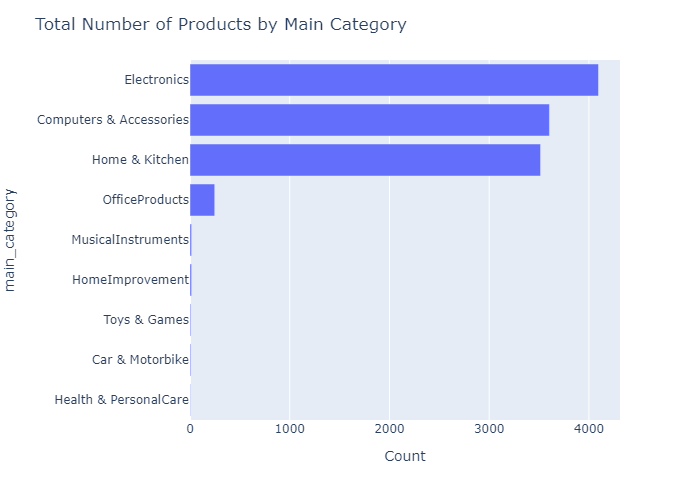

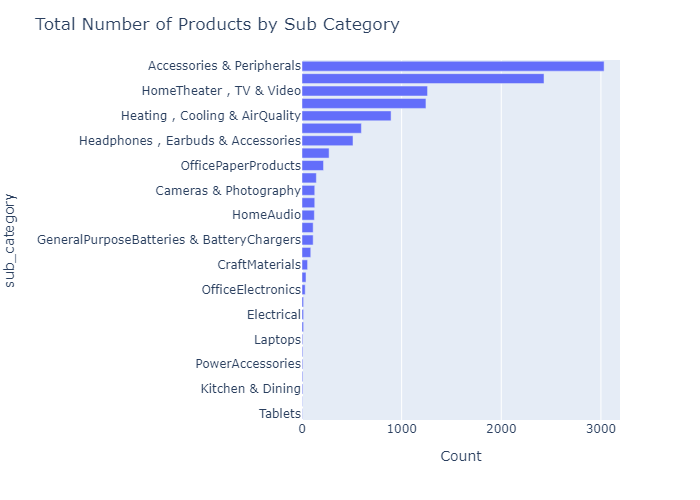

In [19]:
#total product by Main and Sub Category
main_cat = df1[['main_category', 'product_id']]
sub_cat = df1[['sub_category', 'product_id']]
main_pivot = pd.pivot_table(main_cat, index=['main_category'], aggfunc = "count")
main_pivot.rename(columns={'product_id': "Total Products"}, inplace=True)
main_pivot.sort_values(by='Total Products', inplace=True)

sub_pivot = pd.pivot_table(sub_cat, index=['sub_category'], aggfunc = "count")
sub_pivot.rename(columns={'product_id': "Total Products"}, inplace=True)
sub_pivot.sort_values(by='Total Products', inplace=True)

fig_cat = px.bar(main_pivot, y=main_pivot.index, x='Total Products')
fig_cat.update_layout(title = "Total Number of Products by Main Category", xaxis_title = "Count")

fig_cat2 = px.bar(sub_pivot, y=sub_pivot.index, x='Total Products')
fig_cat2.update_layout(title = "Total Number of Products by Sub Category", xaxis_title = "Count")

fig_cat.show()
fig_cat2.show()

In [20]:
#make a table for category pie chart
main_cat_table = df1['main_category'].value_counts().rename_axis('Main Category').reset_index(name="Total Counts")
sub_cat_table = df1['sub_category'].value_counts().rename_axis('Sub Category').reset_index(name="Total Counts")
main_cat_table
sub_cat_table

,Sub Category,Total Counts
0,Accessories & Peripherals,3032
1,Kitchen & HomeAppliances,2429
2,"HomeTheater , TV & Video",1260
3,Mobiles & Accessories,1244
4,"Heating , Cooling & AirQuality",894
5,WearableTechnology,596
6,"Headphones , Earbuds & Accessories",512
7,NetworkingDevices,272
8,OfficePaperProducts,216
9,ExternalDevices & DataStorage,144


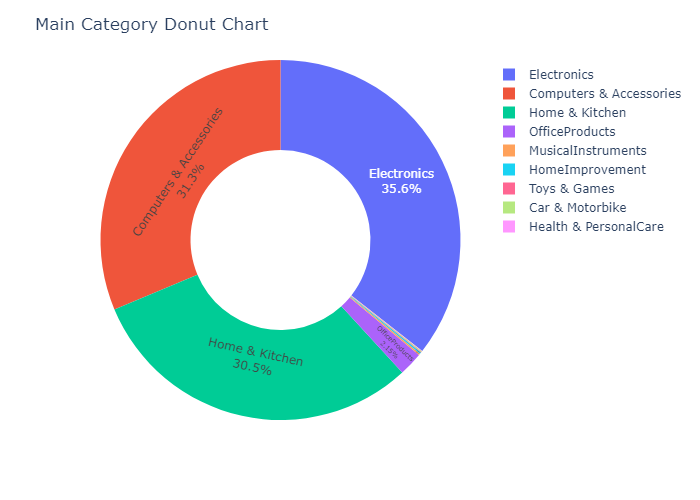

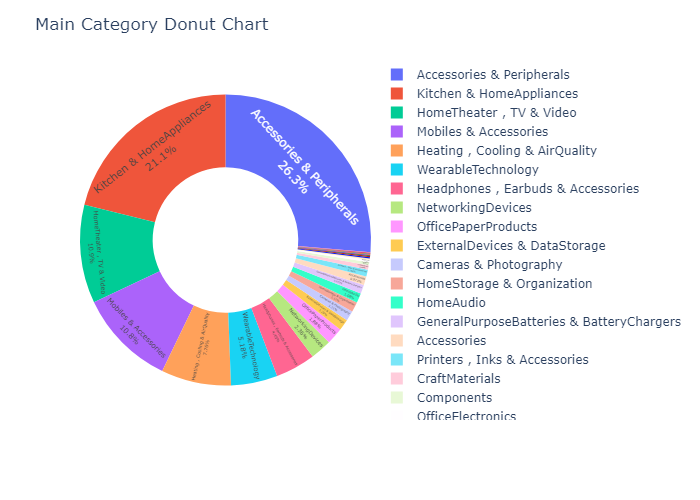

In [21]:
fig_mc = px.pie(main_cat_table, values='Total Counts', names='Main Category', hole=0.5)
fig_mc.update_traces(textposition = 'inside', textinfo = 'percent+label')
fig_mc.update_layout(title="Main Category Donut Chart")

fig_sc = px.pie(sub_cat_table, values='Total Counts', names='Sub Category', hole=0.5)
fig_sc.update_traces(textposition = 'inside', textinfo = 'percent+label')
fig_sc.update_layout(title="Main Category Donut Chart")

fig_mc.show()
fig_sc.show()

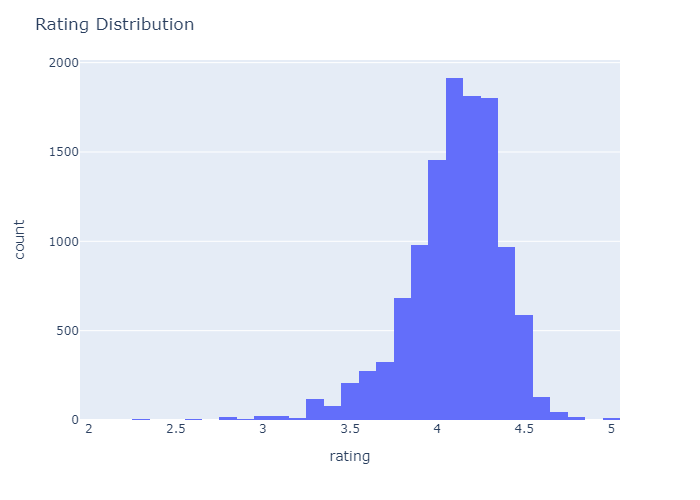

In [22]:
#rating distribution
fig3 = px.histogram(df1, x = 'rating')
fig3.update_layout (title='Rating Distribution',
                    xaxis_title = 'rating')
fig3.show()

In [23]:
#Classify Customer Satisfaction by rating
customer_satisfaction = []

for s in df1['rating']:
    if s < 2.0: customer_satisfaction.append('Very Dissatisfied')
    elif s < 3.0: customer_satisfaction.append('Dissatisfied')
    elif s < 4.0: customer_satisfaction.append('Neutral')
    elif s < 5.0: customer_satisfaction.append('Satisfied')
    elif s == 5.0: customer_satisfaction.append('Very Satisfied')

In [24]:
df1['customer_satisfaction'] = customer_satisfaction
df1['customer_satisfaction'] = df1['customer_satisfaction'].astype('category')

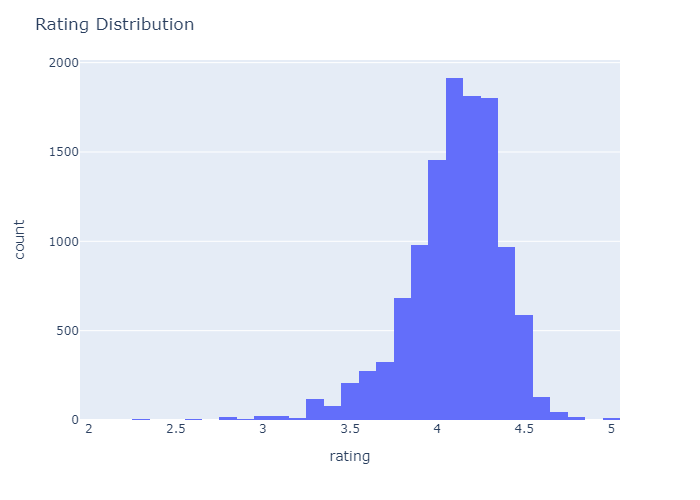

In [25]:
fig_ = px.histogram(df1, x = 'rating')
fig3.update_layout (title='Rating Distribution',
                    xaxis_title = 'rating')
fig3.show()

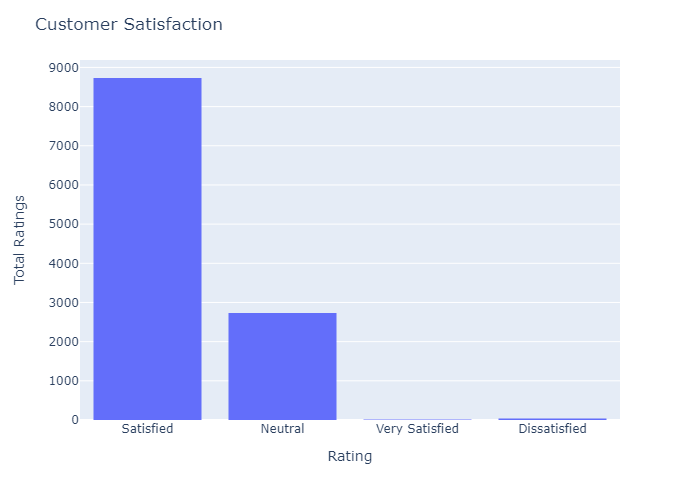

In [26]:
#Visualizing customer_satisfaction  
fig4 = px.histogram(df1, x = 'customer_satisfaction')
fig4.update_layout (title='Customer Satisfaction',
                    xaxis_title = 'Rating', yaxis_title = "Total Ratings")
fig4.show()

In [27]:
#make a table for satisfaction pie chart
customer_satisfaction_table = df1['customer_satisfaction'].value_counts().rename_axis('Customer Satisfaction').reset_index(name="Total Counts")
customer_satisfaction_table

,Customer Satisfaction,Total Counts
0,Satisfied,8730
1,Neutral,2732
2,Dissatisfied,39
3,Very Satisfied,14


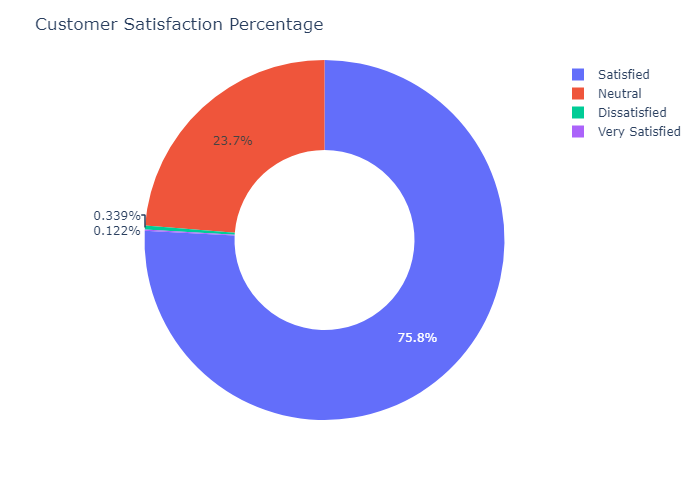

In [28]:
fig5 = px.pie(customer_satisfaction_table, values='Total Counts', names='Customer Satisfaction', hole=0.5)
fig5.update_layout(title="Customer Satisfaction Percentage")
fig5.show()